We will work through an example project end to end,
pretending to be a recently hired data scientist at a real estate company. Here
are the main steps you will go through:
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune the  model.
7. Present the solution.
8. Launch, monitor, and maintain your system.

Welcome to the Machine Learning Housing Corporation! Your first task is to
use California census data to build a model of housing prices in the state.

This data includes metrics such as the population, median income, and median
housing price for each block group in California.

First, you need to frame the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or
something else?

Let’s see:
- It is clearly a typical supervised
learning task, since you are given labeled training examples (each instance
comes with the expected output, i.e., the district’s **median housing price**).
- It is
also a typical regression task, since you are asked to predict a value - **median_house_value**. More
specifically, this is a **multiple regression problem**, since the system will use
multiple features to make a prediction (it will use the district’s population, the
median income, etc.).

In [4]:
import pandas as pd
import numpy as np

In [5]:
housing = pd.read_csv('https://raw.githubusercontent.com/instituteofai/ML-101/master/Datasets/cal_housing.csv')
housing.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations**

- There are 20,640 instances in the dataset
- the **total_bedrooms** attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.
- All attributes are numerical, except the ocean_proximity field
- Looking at the at the top five rows of the dataset, you probably noticed that the values in the **ocean_proximity column were repetitive**, which means that it is **probably a categorical attribute**. We can find out what categories exist and how many districts belong to each category by using the `value_counts()` method:

In [7]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- The count, mean, min, and max rows are self-explanatory. Note that the null
values are ignored (so, for example, the **count of total_bedrooms is 20,433, not 20,640)**.
- The std row shows the standard deviation, which measures how
dispersed the values are.
- The 25%, 50%, and 75% rows show the
corresponding percentiles: a percentile indicates the value below which a
given percentage of observations in a group of observations fall.  
For example,
**25% of the districts have a housing_median_age lower than 18**, while 50%
are lower than 29 and 75% are lower than 37. These are often called the 25th
percentile (or first quartile), the median, and the 75th percentile (or third
quartile)

Another quick way to get a feel of the type of data you are dealing with is to
**plot a histogram for each numerical attribute**. A histogram shows the number
of instances (on the vertical axis) that have a given value range (on the
horizontal axis). You can either plot this **one attribute at a time, or** you can
**call the `hist()` method on the whole dataset**.

Note: You can call the plots from panda objects itself.

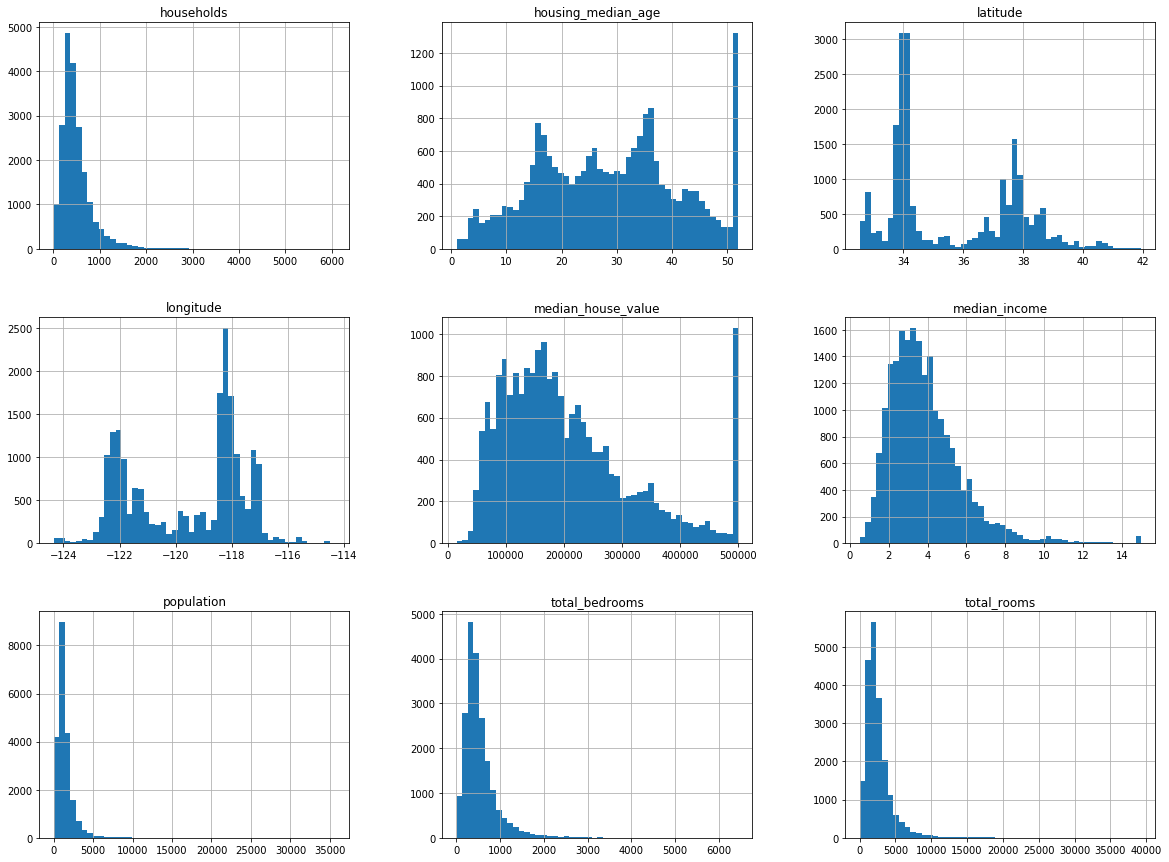

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15),)
plt.show()

In [13]:
# Create a test set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # random_state: reproducibility

print(housing.shape)
print(train_set.shape)
print(test_set.shape)

(20640, 10)
(16512, 10)
(4128, 10)


In [15]:
housing = train_set.copy()

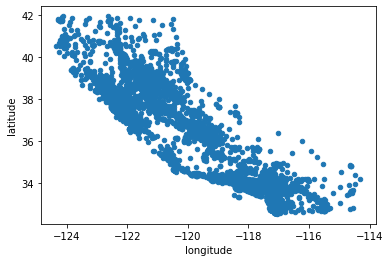

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude')

In [17]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN


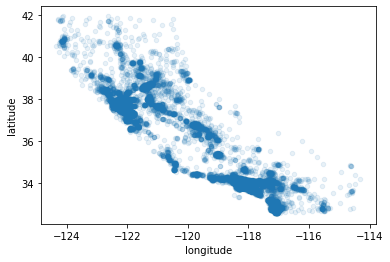

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

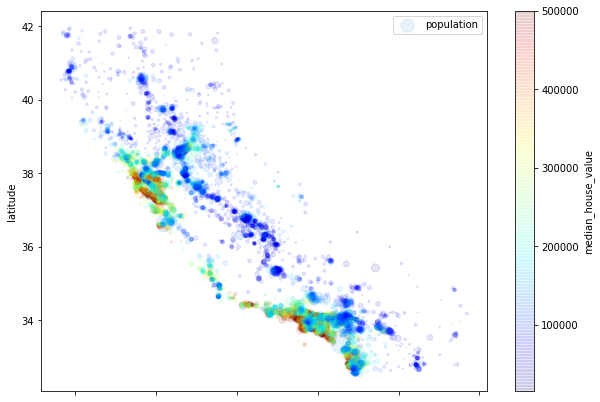

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
            s=housing['population']/100, label='population', figsize=(10, 7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

California housing prices:
- **red is expensive**
- **blue is cheap**
- **larger circles indicate areas with a larger population**

This image tells you that the **housing prices are very much related to the location (e.g., close to the ocean) and to the population density**, as we
probably knew already.

In [23]:
# correlation

corr_matrix = housing.corr()

In [24]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1.
- When it is close to 1, it means
that there is a strong positive correlation; for example, the **median house value** tends to go up when the **median income** goes up.
- When the coefficient is
close to –1, it means that there is a strong negative correlation; we can see a
small **negative correlation between the** **latitude** and the **median house value**
(i.e., **prices have a slight tendency to go down when you go north**).
- Finally,
coefficients close to 0 mean that there is no linear correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159BEB61148>,
      dtype=object)

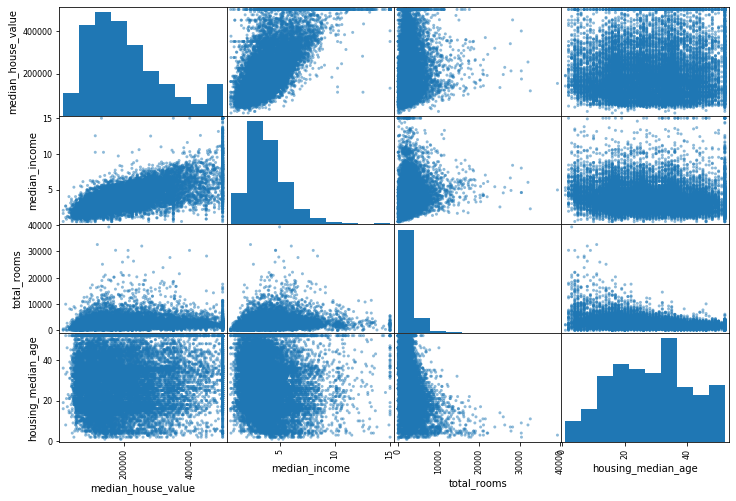

In [26]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12, 8))

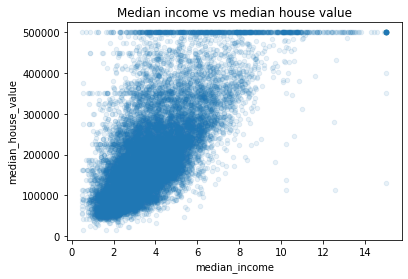

In [27]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, title="Median income vs median house value")

**Attribute Combinations**  

The **total number of rooms in a district is not very useful** if we don’t know how many households there are.

What we really want is the **number of rooms per household**.

Similarly, the **total number of bedrooms by itself is not very useful**: we probably want to compare it to the **number of rooms** and the **population per household also seems like an interesting attribute combination**
to look at. Let’s create these new attributes:

In [28]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

housing['population_per_household'] = housing['population'] / housing['households']

In [29]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000
